In [53]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import seaborn as sns


In [2]:
ds_2025 = xr.open_dataset("files/2025_KVS_deployment_flagged.nc")
ds_2024 = xr.open_dataset("files/2024_KVS_deployment_flagged.nc")

In [12]:
ds_2025_time_temp = ds_2025["time_temp"]
ds_2025_1m_temp = ds_2025["temp_1m_calibrated"]
ds_2025_1m_labels = ds_2025["temp_1m_quality_flag"]
ds_2025_ir_temp = ds_2025["temp_snowsurface"]
ds_2025_temp_diff = ds_2025_1m_temp - ds_2025_ir_temp

ds_2024_time_temp = ds_2024["time_temp"]
ds_2024_1m_temp = ds_2024["temp_1m_calibrated"]
ds_2024_1m_lab = ds_2024["temp_1m_quality_flag"]
ds_2024_ir_temp = ds_2024["temp_snowsurface_calibrated"]
ds_2024_temp_diff = ds_2024_1m_temp - ds_2024_ir_temp

#### Line plots

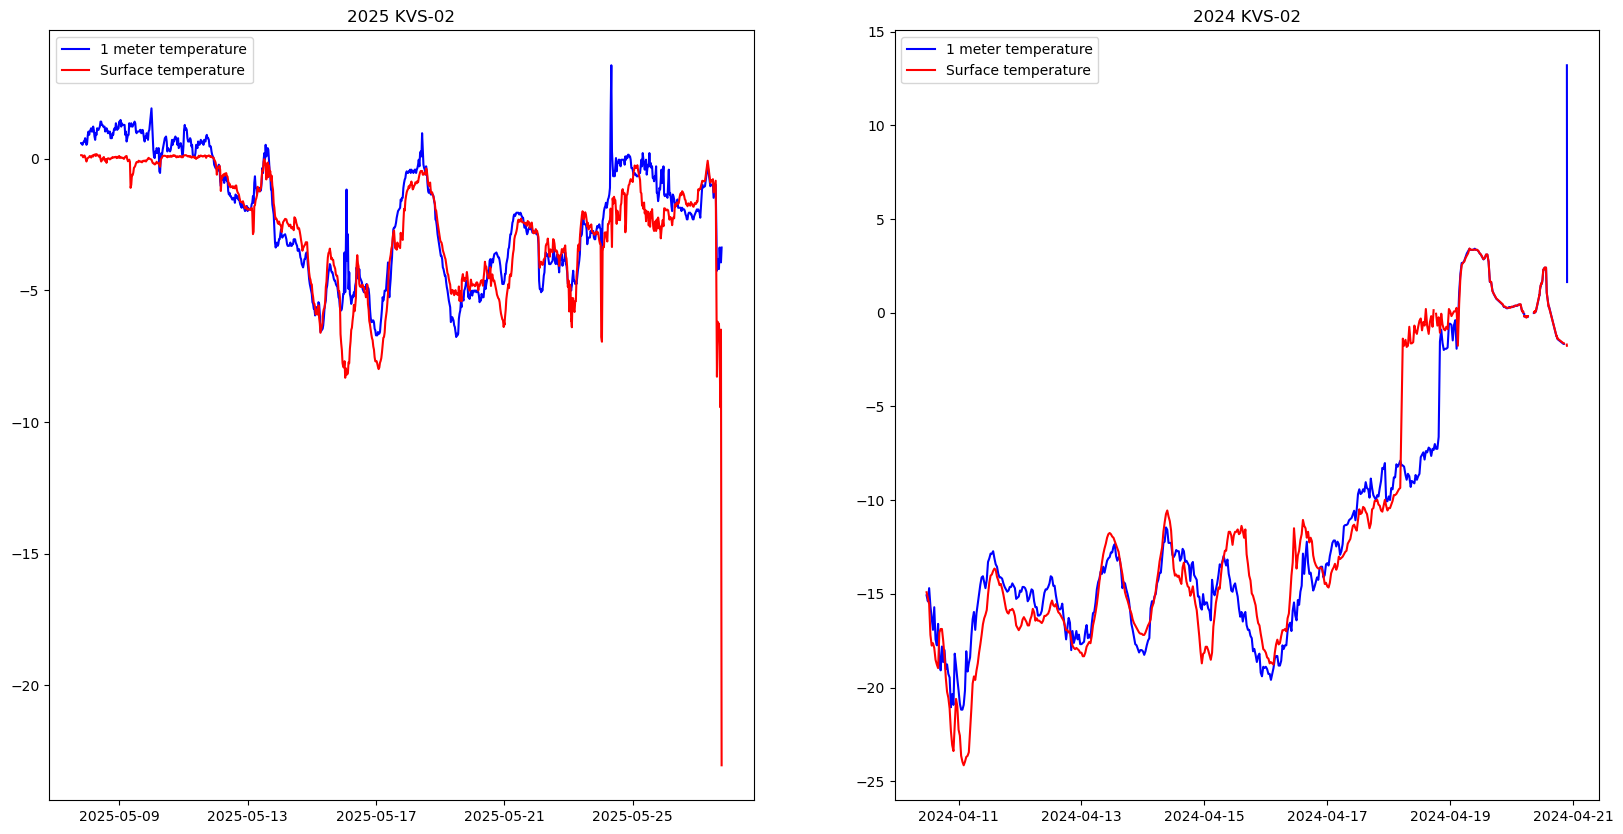

In [83]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
temp1 = ds_2025_1m_temp.isel(trajectory=1)
ir1 = ds_2025_ir_temp.isel(trajectory=1)
time1 = ds_2025_time_temp.isel(trajectory=1)

ax1.plot(time1, temp1-273.15,color="blue",label="1 meter temperature")
ax1.plot(time1, ir1-273.15,color='red',label="Surface temperature")
ax1.set_title(f"2025 KVS-{str(ds_2025["trajectory"].isel(trajectory=1).values).split("_")[-1]}")
ax1.legend()

ax2 = plt.subplot(1,2,2)
temp2 = ds_2024_1m_temp.isel(trajectory=1)
ir2 = ds_2024_ir_temp.isel(trajectory=1)
time2 = ds_2024_time_temp.isel(trajectory=1)


ax2.plot(time2, temp2-273.15,color="blue",label="1 meter temperature")
ax2.plot(time2, ir2-273.15,color='red',label="Surface temperature")
ax2.set_title(f"2024 {ds_2024["trajectory"].isel(trajectory=1).values}")
ax2.legend()

fig.savefig("figures/example_temperature_plot.png")

#### Maps

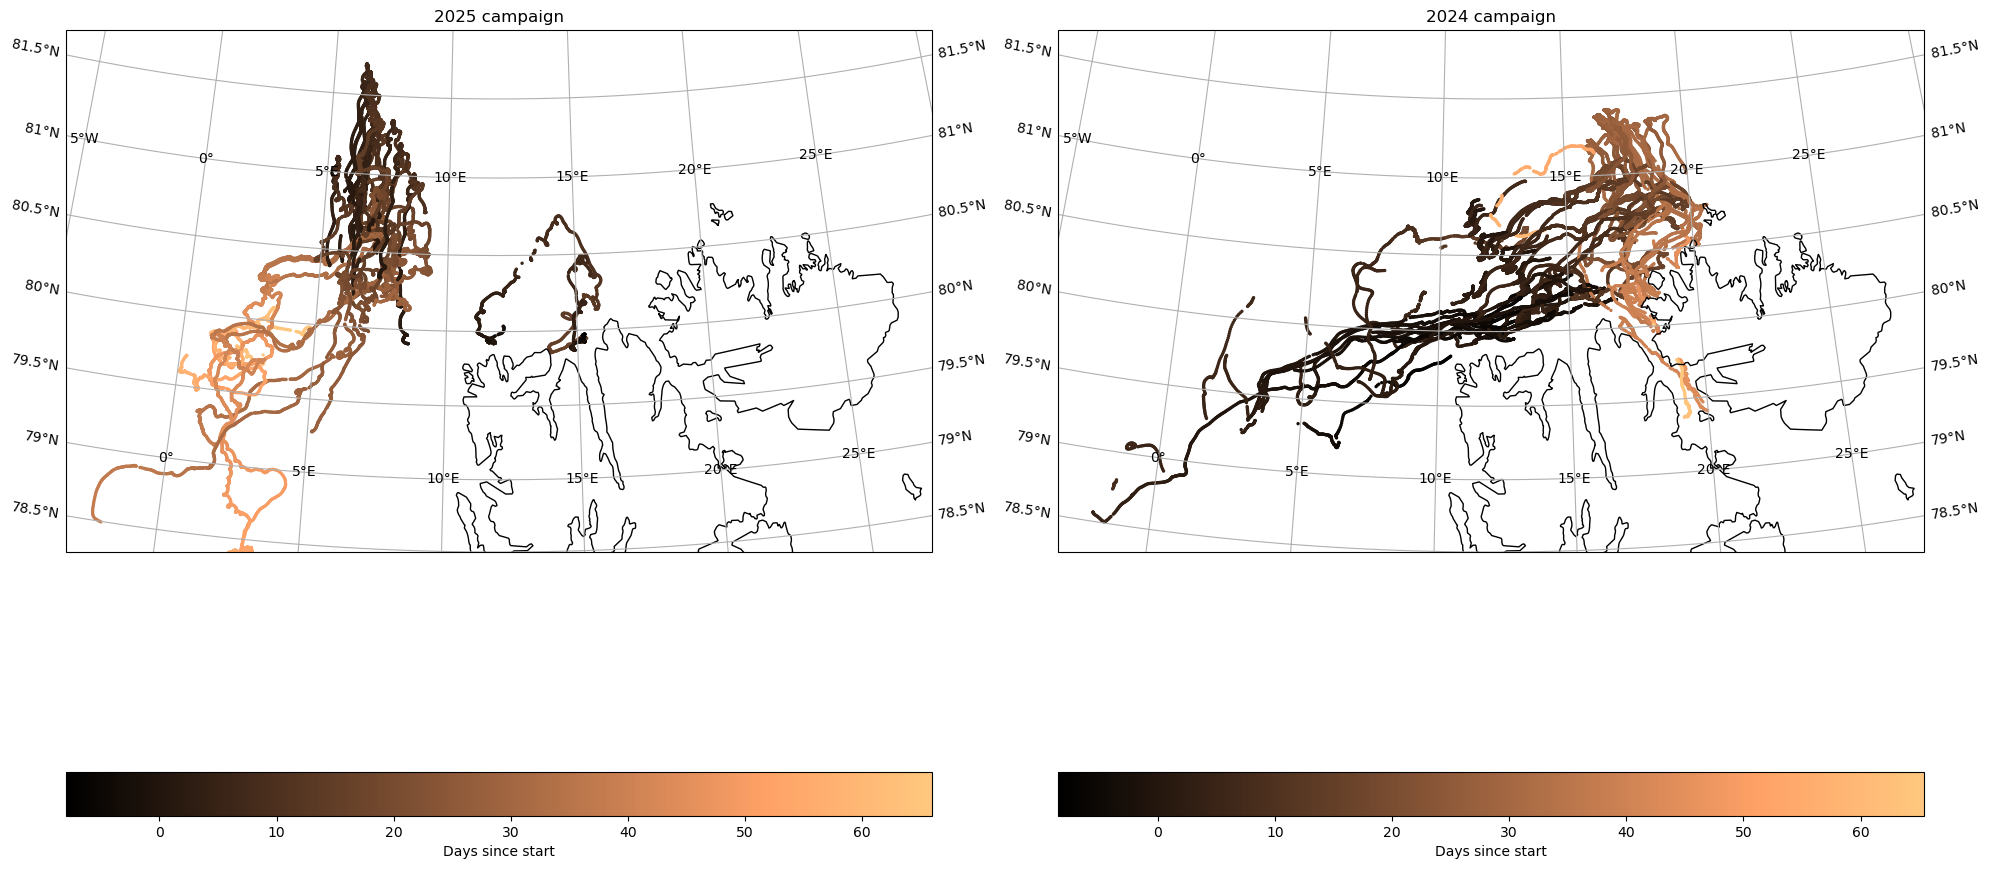

In [84]:
centr_lon = 12
dlon = 15
centr_lat = 80
dlat = 3.5
projection = ccrs.LambertConformal(central_longitude=centr_lon, central_latitude=centr_lat)

fig = plt.figure(figsize=(20,15))
ax = plt.subplot(1,2,1,projection=projection)

time_pos_traj_full = ds_2025['time'].values
time_pos_traj = time_pos_traj_full[~np.isnat(time_pos_traj_full)]

time_temp_traj_full = ds_2025['time_temp'].values
time_temp_traj = time_temp_traj_full[~np.isnat(time_temp_traj_full)]

time_pos_days = (time_pos_traj  - time_pos_traj[0]) / np.timedelta64(1, 'D')
last_time_idx = np.where(~np.isnat(time_temp_traj_full))[0][-1]

lat_traj = ds_2025['lat'].values[~np.isnat(time_pos_traj_full)]
lon_traj = ds_2025['lon'].values[~np.isnat(time_pos_traj_full)]

sc = ax.scatter(lon_traj, lat_traj, c=time_pos_days, cmap='copper', label='Days since start', transform=ccrs.PlateCarree(), s=2)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([centr_lon - dlon, centr_lon + dlon, centr_lat - dlat / 2, centr_lat + dlat / 2], crs=ccrs.PlateCarree())
ax.set_title("2025 campaign")

cbar = plt.colorbar(sc, orientation='horizontal')
cbar.set_label('Days since start')
cmap = plt.cm.gray.copy()
cmap.set_bad(color='rosybrown')
plt.tight_layout()

ax1 = plt.subplot(1,2,2,projection=projection)

time_pos_traj_full = ds_2024['time'].values
time_pos_traj = time_pos_traj_full[~np.isnat(time_pos_traj_full)]

time_temp_traj_full = ds_2024['time_temp'].values
time_temp_traj = time_temp_traj_full[~np.isnat(time_temp_traj_full)]

time_pos_days = (time_pos_traj  - time_pos_traj[0]) / np.timedelta64(1, 'D')
last_time_idx = np.where(~np.isnat(time_temp_traj_full))[0][-1]

lat_traj = ds_2024['lat'].values[~np.isnat(time_pos_traj_full)]
lon_traj = ds_2024['lon'].values[~np.isnat(time_pos_traj_full)]

sc = ax1.scatter(lon_traj, lat_traj, c=time_pos_days, cmap='copper', label='Days since start', transform=ccrs.PlateCarree(), s=2)

ax1.coastlines()
ax1.gridlines(draw_labels=True)
ax1.set_extent([centr_lon - dlon, centr_lon + dlon, centr_lat - dlat / 2, centr_lat + dlat / 2], crs=ccrs.PlateCarree())
ax1.set_title("2024 campaign")

# Colorbar trajectory map
cbar = plt.colorbar(sc, orientation='horizontal')
cbar.set_label('Days since start')
cmap = plt.cm.gray.copy()
cmap.set_bad(color='rosybrown')
plt.tight_layout()

plt.savefig("figures/trajectory_map.png")


#### The compiled temperature dataset

In [75]:
temp1_pooled = pool_data(ds_2025_1m_temp)-273.15
temp2_pooled = pool_data(ds_2024_1m_temp)-273.15

ir1_pooled = pool_data(ds_2025_ir_temp)-273.15
ir2_pooled = pool_data(ds_2024_ir_temp)-273.15

diff1_pooled = pool_data(ds_2025_temp_diff)
diff2_pooled = pool_data(ds_2024_temp_diff)

Text(0.5, 1.0, 'Surface temperature 2024')

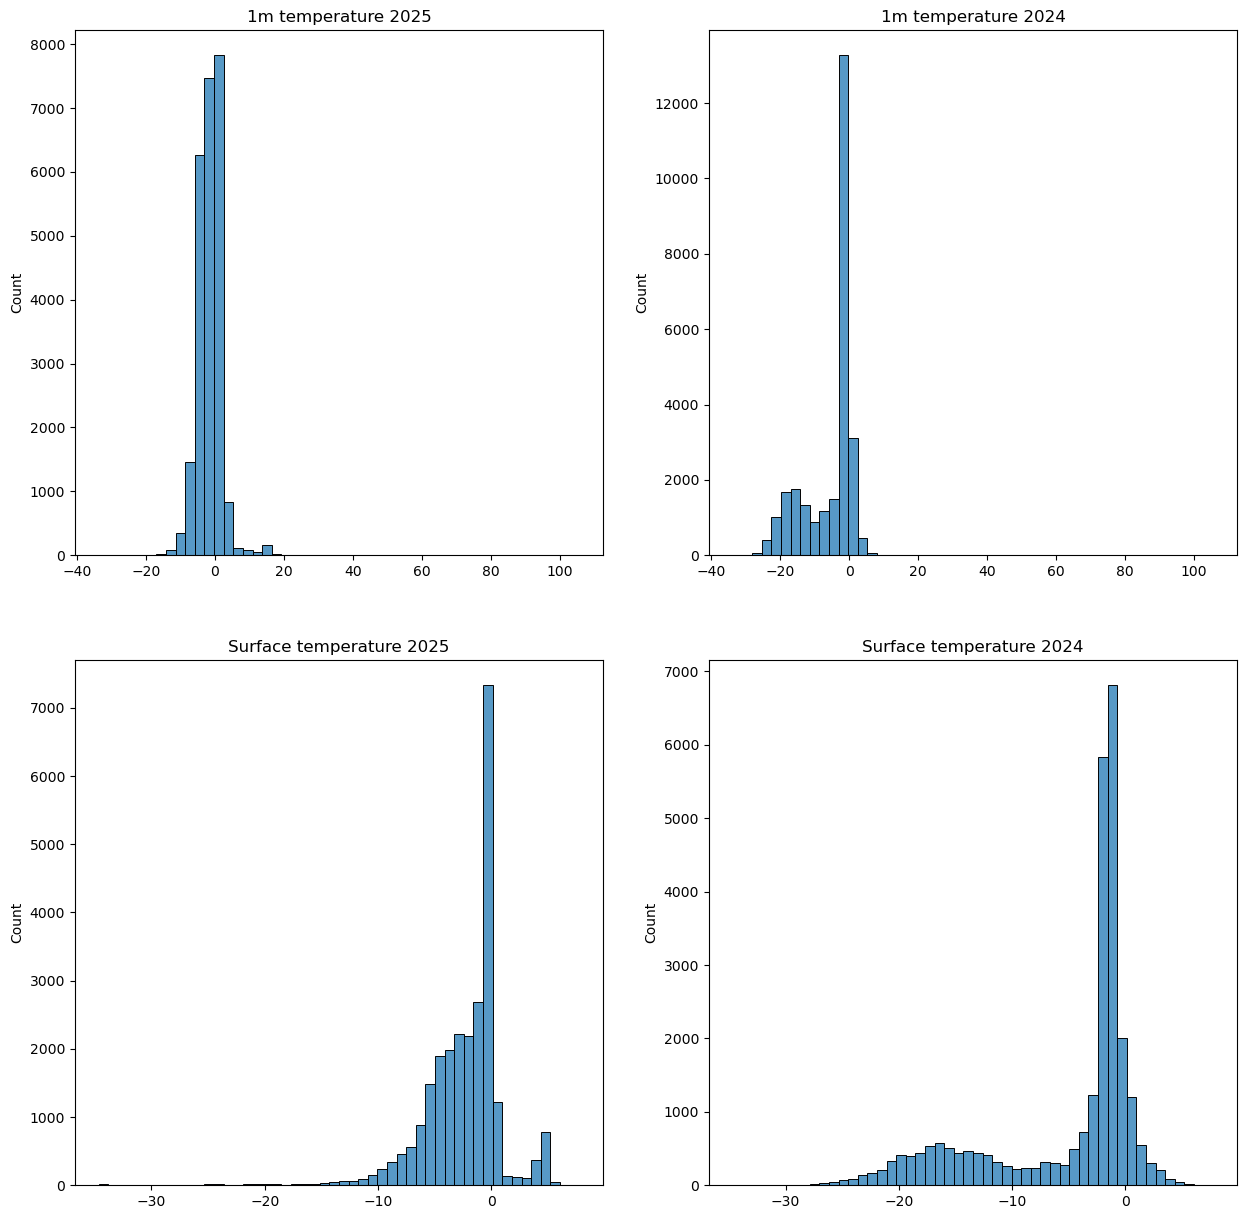

In [74]:
fig = plt.figure(figsize=(15,15))

bins_temp = np.histogram_bin_edges(temp1_pooled,bins=50)
bins_ir = np.histogram_bin_edges(ir1_pooled,bins=50)

ax = plt.subplot(2,2,1)
sns.histplot(temp1_pooled,ax=ax,bins=bins_temp)
ax.set_title("1m temperature 2025")

ax1 = plt.subplot(2,2,2)
sns.histplot(temp2_pooled,ax=ax1,bins=bins_temp)
ax1.set_title("1m temperature 2024")

ax2 = plt.subplot(2,2,3)
sns.histplot(ir1_pooled,ax=ax2,bins=bins_ir)
ax2.set_title("Surface temperature 2025")

ax3 = plt.subplot(2,2,4)
sns.histplot(ir2_pooled,ax=ax3,bins=bins_ir)
ax3.set_title("Surface temperature 2024")

Text(0.5, 1.0, 'Spread of 1m - surface 2024')

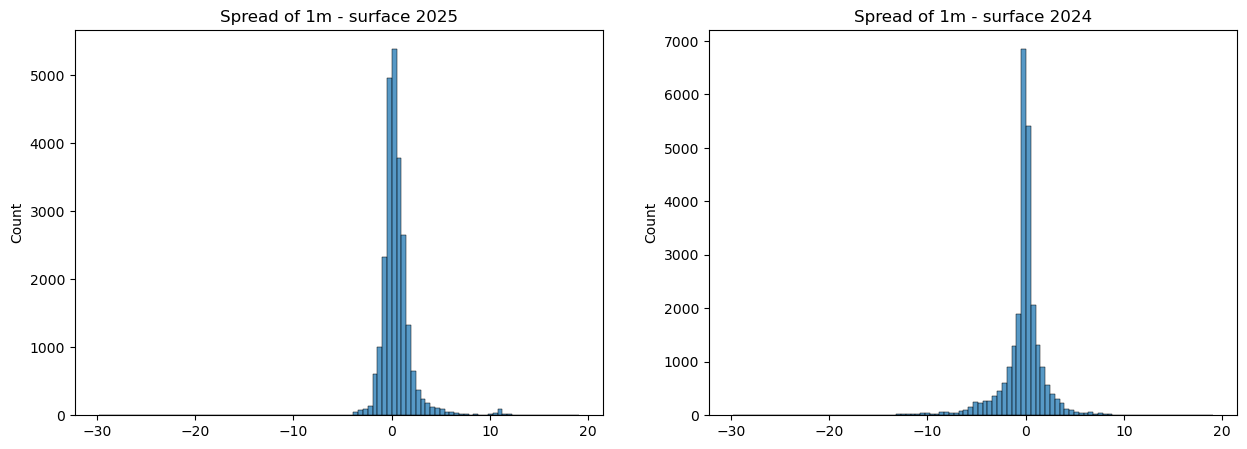

In [81]:
fig = plt.figure(figsize=(15,5))
bins = np.histogram_bin_edges(diff2_pooled, bins=100)

ax = plt.subplot(1,2,1)
sns.histplot(diff1_pooled,ax=ax,bins=bins)
ax.set_title("Spread of 1m - surface 2025")


ax1 = plt.subplot(1,2,2)
sns.histplot(diff2_pooled,ax=ax1,bins=bins)
ax1.set_title("Spread of 1m - surface 2024")